# `CREDIT CARD FRAUD DETECTION` 

## Project Overview 

## Introduction

* In today's digital age, the rise of electronic transactions and credit card usage has brought about numerous benefits, but it has also introduced new challenges. One of the most pressing issues is the detection and prevention of credit card fraud. 
* Fraudulent credit card transactions can result in significant financial losses for both financial institutions and cardholders. To mitigate these risks, the development of robust and accurate credit fraud detection systems is paramount.
* This project focuses on leveraging machine learning techniques to build a credit fraud detection model. The primary objective is to develop a system capable of identifying fraudulent credit card transactions with a high degree of accuracy and efficiency.

## Problem Statement 

* Build a machine learning model to identify fraudulent credit card
transactions.
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
* Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
* Evaluate the model's performance using metrics like precision, recall and F1-score, and consider techniques like oversampling or
undersampling for improving results.

## Objectives

* To preprocess and normalize the transaction data. This includes data cleaning, feature engineering, and ensuring data consistency. Proper preprocessing is crucial as it lays the foundation for effective model training.

### Import the required Libraries

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Load and Understand the Data

In [3]:
credit_data = pd.read_csv(r"C:\Users\wanji\Desktop\Data\archive (7)\creditcard.csv")
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


---

## Understanding the Dataset
* Check dataset info
* Dataset Shape
* Columns, Column Names, Data Types
* Check for percentage of missing values and duplicated values

In [4]:
# Build a class that will understand datase

class dataanalyzer:
    # initialize the class
    def __init__(self, data):
        self.data = data

    # calculate percentage of missing values
    def calculate_missing_percentage(self):
        missing_values_perce = (self.data.isnull().sum()/len(self.data))*100
        return missing_values_perce

    # Calculate percentage of duplicates
    def calculate_duplicates_percentage(self):
        duplicated_perce = (self.data.duplicated().sum()/len(self.data))*100
        return duplicated_perce

    # To displaying shape
    def display_shape(self):
        shape = self.data.shape
        return shape

    # Displaying info
    def display_info(self):
        info = self.data.info()
        return info

    # Display the description
    def display_describe(self):
        describe = self.data.describe()
        return describe

In [5]:
# Instantiating the class
analyzer = dataanalyzer(credit_data)

In [6]:
# Check for the general information of the dataset
info = analyzer.display_info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Check for the shape
shape = analyzer.display_shape()
print(shape)

(284807, 31)


In [8]:
# Examine the columns in the dataset
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

---

## Identifying missing values, duplicates and handling them 

In [9]:
# Check for the missing values
missing_val_perce = analyzer.calculate_missing_percentage()
print(missing_val_perce)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


* From the above there are no missing values

In [10]:
# Function to check for missing values and duplicates
def dataset_duplicated(dataset):
  
    dataset_duplicated = dataset.duplicated().sum()
    print(dataset_duplicated)


dataset_duplicated(credit_data)

1081


* There are several duplicates in the dataset and we are going to drop them 

In [11]:
def drop_duplicates(dataset):
    dataset.drop_duplicates(inplace = True)
    
drop_duplicates(credit_data) 

In [12]:
dataset_duplicated(credit_data)

0


* Having dropped the duplicates, there are no duplicates 

---

## Data Exploration: EDA Analysis

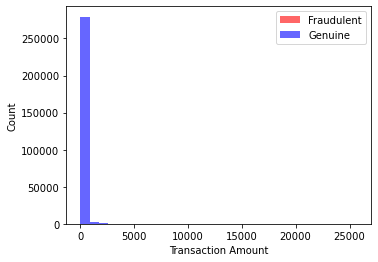

In [13]:
# 1. Data Visualization
# 1.1. Histograms
fraudulent_data = credit_data[credit_data['Class'] == 1]
genuine_data = credit_data[credit_data['Class'] == 0]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(fraudulent_data['Amount'], bins=30, color='red', alpha=0.6, label='Fraudulent')
plt.hist(genuine_data['Amount'], bins=30, color='blue', alpha=0.6, label='Genuine')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend()

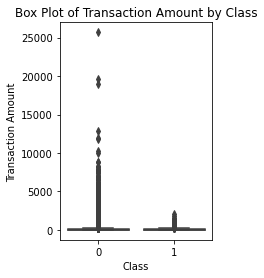

In [17]:
# 1.2. Box Plots
plt.subplot(122)
sns.boxplot(x='Class', y='Amount', data=credit_data)
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.title('Box Plot of Transaction Amount by Class')

plt.show()

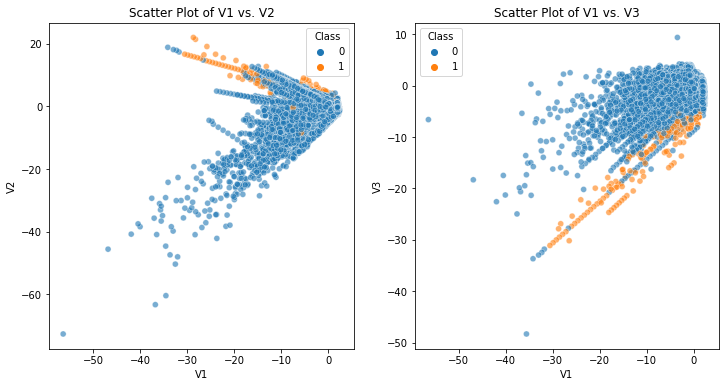

In [18]:
# 1.4. Scatter Plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.scatterplot(x='V1', y='V2', data=credit_data, hue='Class', alpha=0.6)
plt.title('Scatter Plot of V1 vs. V2')

plt.subplot(122)
sns.scatterplot(x='V1', y='V3', data=credit_data, hue='Class', alpha=0.6)
plt.title('Scatter Plot of V1 vs. V3')

plt.show()

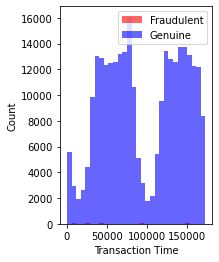

In [20]:
# 1.3. Histograms for Time
plt.subplot(121)
plt.hist(fraudulent_data['Time'], bins=30, color='red', alpha=0.6, label='Fraudulent')
plt.hist(genuine_data['Time'], bins=30, color='blue', alpha=0.6, label='Genuine')
plt.xlabel('Transaction Time')
plt.ylabel('Count')
plt.legend()

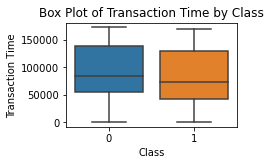

In [22]:
plt.subplot(224)
sns.boxplot(x='Class', y='Time', data=credit_data)
plt.xlabel('Class')
plt.ylabel('Transaction Time')
plt.title('Box Plot of Transaction Time by Class')

plt.tight_layout()
plt.show()

---

## Feature Engineering 